## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Шаг 1. Изучение данных

In [535]:
import pandas as pd

In [536]:
import numpy as np

In [537]:
import matplotlib.pyplot as plt

In [538]:
import seaborn as sns

In [539]:
from scipy import stats as st

In [540]:
df = pd.read_csv('/datasets/games.csv')

In [541]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Вывод
Мы видим таблицу с данными из открытых источников о продажах игр.

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).
https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board
«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам» Игра подходит для лиц от 13 лет.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет
.
«RP» («Rating Pending») — «Рейтинг ожидается»:

K-A for Kids to Adults: Games that contain content that is suitable for a general audience. This rating was used until the year 1998 when it renamed to E

В данных есть проблемы с типами, проблемы с верхними регистрами, есть пропуски.

Полагаю пропуски связаны с нехваткой данных из-за большого периода выпуска игр, возможно рейтинги не столь давно ведут. Еще возможно часть игр не имеет больших продаж и ее даже не оценивали.

## Шаг 2. Подготовка данных 



### Шаг 2.1. Предобработка данных

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [543]:
#приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [544]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [545]:
df.isnull().sum() #пропуски

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [546]:
df.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце name имеется два пропуска. Оба от 1993 года, к тому же имеют много пропусков в других столбцах . Избавимся от них, на результат дальнейшего исследования они не повлияют.

In [547]:
df.dropna(subset = ['name'], inplace = True)

В столбцах year_of_release и user_score заменим тип данных, предварительно заменив пропущенные значение на нетипичное -1. Год выпуска - это целое число, поэтому эти значения будут указаны в формате int64

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Наблюдения со значением tbd в столбце user_score заменим на -1.

In [548]:
df['user_score'] = df['user_score'].replace('tbd', -1)
df['year_of_release'] = df['year_of_release'].fillna(-1).astype(int)
df['user_score'] = df['user_score'].fillna(-1).astype(float)



Пропуски в столбцах critic_score и user_score (также как и в year_of_release и rating) могли появиться по разным причинам. Можно заметить, что у старых наблюдений отсутствует рейтинг и оценка критиков/пользователей. Напрашивается мысль, что раньше эти данные просто не собирались. Но пропуски есть и у относительно новых наблюдений. Здесь могли сыграть роль баги системы, ошибки при выгрузке данных, человеческий фактор и другие.

В user_score мы уже заполнили пропуски нетипичным значением -1. Сделаем то же самое с пропусками в critic_score, а затем будем учитывать это в дальнейшей работе. Это поможет нам сохранить данные и не повлиять на результаты исследования.

In [549]:
df['critic_score'] = df['critic_score'].fillna(-1)


In [550]:
df['rating'] = df['rating'].fillna('Unknown')

In [551]:
#рейтинг K-A заменим на E, так как это одна и тп же категория
df['rating'] = df['rating'].replace('K-A', 'E')

In [552]:
df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Шаг 2.2. Категоризация данных

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [554]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [555]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,Unknown,28.31


### Вывод:

привели названия столбцов к нижнему регистру;

преобразовали данные в year_of_release в формат int64, а в user_score в float64;

обработали пропуски - в столбцах сritic_score, user_score и rating пропущена почти половина значений. Заполнение этих пропусков синтетическими данными привело бы к искажению результатов исследования, поэтому заменили их на -1 и будем учитывать это в дальнейшем исследовании;

от пропусков в name избавились;

пропуски в rating заменил значением Unknown;

в user_score изменили значения tbd на -1;

посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales



## Шаг 3. Исследовательский анализ данных

In [556]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,31.38


 Обратим внимание на изменение продаж у платформ, начиная с 1980 года и определим промежуток времени, который будем исследовать в дальнейшем.

Text(0.5, 0, 'Год выпуска')

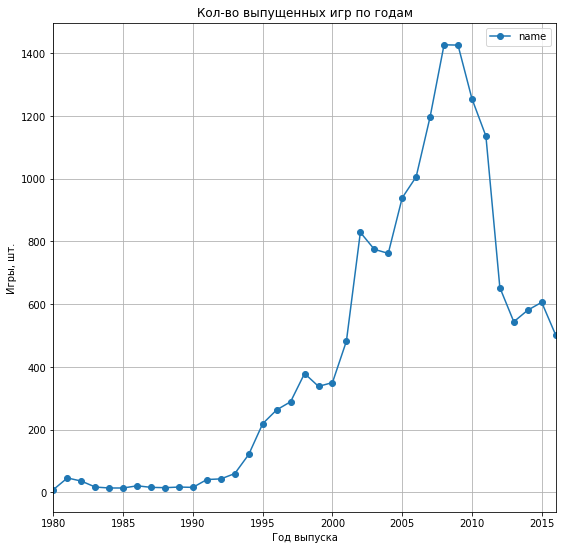

In [557]:
count_by_year = df.query('year_of_release >= 1980').groupby('year_of_release')['name'].count()
count_by_year.plot(legend=True, style='o-', grid=True,figsize=(9, 9), title='Кол-во выпущенных игр по годам')
ax = plt.gca()
ax.set_ylabel('Игры, шт.')
ax.set_xlabel('Год выпуска')


Мы видим резкий рост выпуска игр с 1990 и спад с 2009 года.До 1990 года количество выпускаемых игр малО, и данные за этот период можно считать выбросами. Основной период с 2000 по 2016. 

Компьютерные игры - это очень инновационная отрасль, где каждый год случается революция. Поэтому за актуальный период возьмем короткий период - 2-3 года.  Для прогноза на 2017 год по продажам, возьмём данные за 2014,2015 и 2016 года



Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим какой характерный срок появляются новые и исчезают старые платформы?

In [558]:
top_platforms = (df
    .query('2000 <= year_of_release <= 2017')
    .groupby('platform')
    .agg({'total_sales':['sum']})
    .sort_values(by=('total_sales', 'sum'), ascending=False)
    .head(10)
)
top_platforms

,total_sales
,sum
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.88
PSP,289.53


In [559]:
platf = (df
    .query('platform in @top_platforms.index and 2000 <= year_of_release <= 2017')
    .groupby(['platform','year_of_release'])
    .agg({'total_sales':['sum']})
) 
platf

total_sales
                                 sum
platform year_of_release            
3DS      2011                  63.20
         2012                  51.36
         2013                  56.57
         2014                  43.76
         2015                  27.78
...                              ...
XB       2004                  65.42
         2005                  49.08
         2006                  10.04
         2007                   0.55
         2008                   0.18

[95 rows x 1 columns]

Дропнем мультииндекс с годами и посчитаем количество лет жизни платформы за последние 15 лет без выбросов

In [560]:
platf.droplevel(level=1).index.value_counts()

PS2     12
X360    12
PSP     12
PS3     11
Wii     11
DS      10
XB       9
GBA      8
3DS      6
PS4      4
Name: platform, dtype: int64

In [561]:
platf.droplevel(level=1).index.value_counts().mean()

9.5

Мы видим что средний срок жизни платформы 9.5 лет по данным с 2000 по 2015 год - это актуальный срок жизни платформы. Но самые актуальные для нас данные в посткризисное время после 2008.
Теперь посмотрим данные по топовым платформам именно за интервал с 2014 - 2017


In [562]:
df_new = df.query('year_of_release > 2013')
#найдем платформы с наибольшими суммарными продажами
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
platform_sales.head(10)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [563]:
top_platforms = platform_sales['platform'].to_list()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [564]:
df_new_top = df_new.query('platform in @top_platforms')
df_new_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [565]:
#сводная таблица уже по новым данным
df_new_top.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value='-')

year_of_release,2014,2015,2016
platform,,,
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.6
PS4,100.00,118.90,69.25
PSP,0.24,0.12,-
Wii,3.75,1.14,0.18
X360,34.74,11.96,1.52


За исследуемый период с 2014 по 2016 года назвать потенциально прибыльной (учитывая, что в нашем распоряжении данные не за полный 2016 год) можно только платформу PS4.У остальных топовых платформ выручка снижается.

Построим «ящик с усами» по глобальным продажам c разбивкой по платформам.

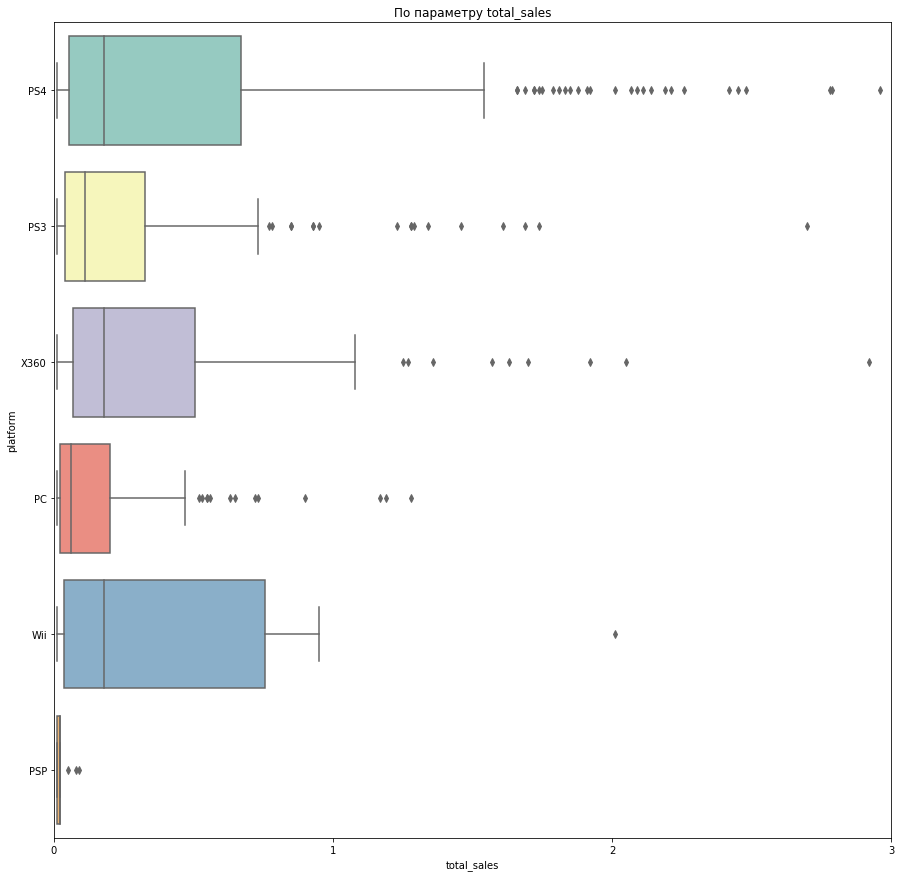

In [566]:


# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(15,15))
sns.boxplot(x = 'total_sales', y = 'platform', data = df_new_top.query('total_sales < 10'), orient="h", palette="Set3")
plt.title(f'По параметру total_sales')
plt.xlim([0,0.1])
plt.xticks([0,1,2,3])
plt.show()

print()

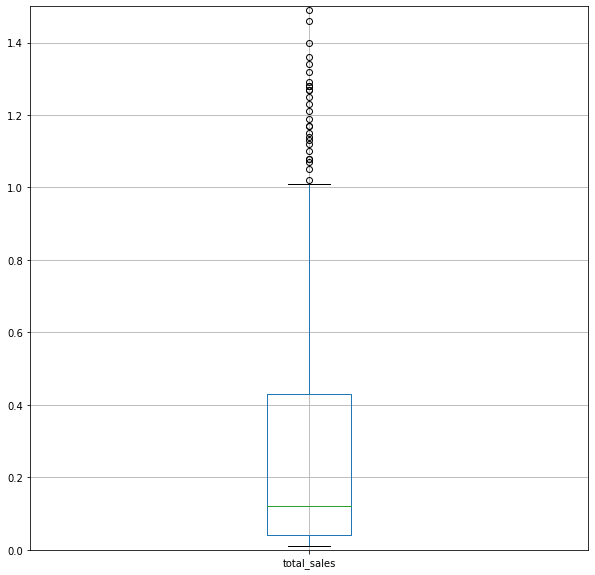

In [567]:
plot = df_new_top.boxplot('total_sales', figsize=(10, 10)).set_ylim(0, 1.5)

Разница в продажах игр очень велика.На графике очень много выбросов (больших значений).

Text(0.5, 0, 'Выручка, млн дол.')

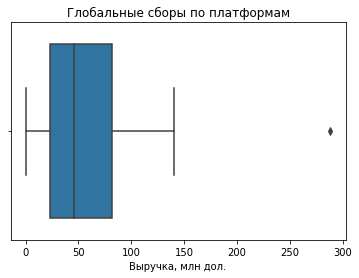

In [568]:

p = df_new.groupby('platform')['total_sales'].sum().reset_index()
ax = sns.boxplot('total_sales', data=p)
ax.set_title('Глобальные сборы по платформам')
ax.set_xlabel('Выручка, млн дол.')

Основная часть значений находится в промежутке 100 - 400, также видим хвост из больших значений, которые однако не влияют на медиану.

Text(0, 0.5, '')

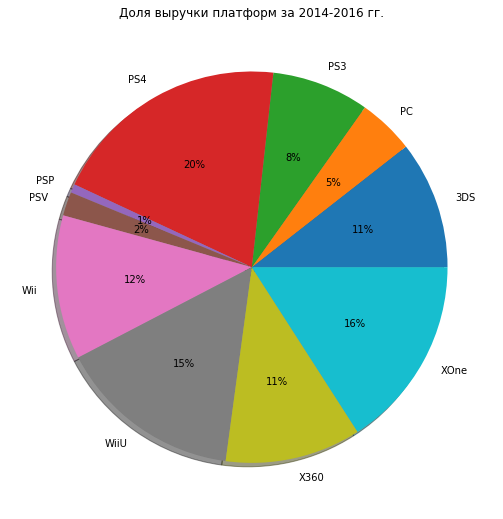

In [569]:
#посмотрим на среднюю выручку платформ по годам за выбранный период
revenue_mean = df_new.groupby('platform')['total_sales'].mean()
revenue_mean.plot(kind='pie', figsize=(9, 9), autopct='%1.0f%%', shadow=True, title='Доля выручки платформ за 2014-2016 гг.')
ax = plt.gca()
ax.set_ylabel('')

За выбранный период есть несколько лидеров по средним продажам - PS4, X360, PS3, Wii, и XOne.

 Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

Посмотрим, как графики и корреляция будут выглядеть для всех десяти платформ.

Text(0.5, 0, 'Оценка пользователей')

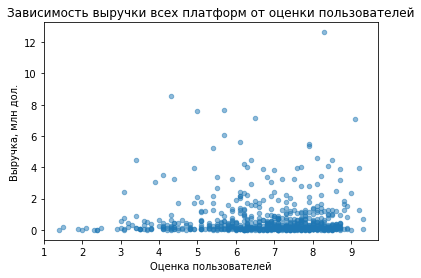

In [570]:
df_new_filtered = df_new.query('user_score != -1 and critic_score != -1')
df_new_filtered.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [571]:
df_new_filtered['total_sales'].corr(df_new_filtered['user_score'])#корреляция


0.005202258360087501

Text(0.5, 0, 'Оценка критиков')

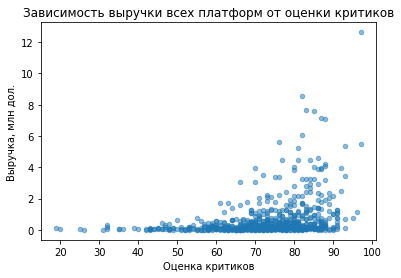

In [572]:
df_new_filtered.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [573]:
df_new_filtered['total_sales'].corr(df_new_filtered['critic_score'])#корреляция

0.32536261200758865

 Разница в корреляции оценка критика/выручка и оценка пользователя/выручка небольшая.

In [574]:
#выделим в отдельную таблицу продажи по PS4
df_new_ps4 = df_new.query('platform == "PS4" and user_score != -1 and critic_score != -1')
df_new_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,Unknown,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


Text(0.5, 0, 'Оценка пользователей')

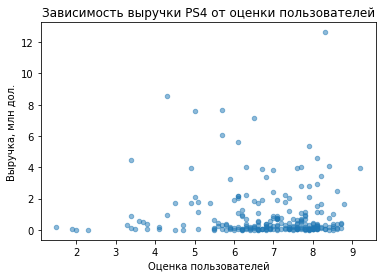

In [575]:
df_new_ps4.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS4 от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [576]:
df_new_ps4['total_sales'].corr(df_new_ps4['user_score'])#корреляция

-0.04318585997193634

Text(0.5, 0, 'Оценка критиков')

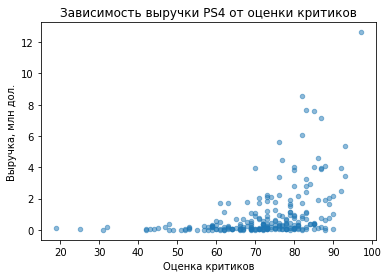

In [577]:
df_new_ps4.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS4 от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [578]:
df_new_ps4['total_sales'].corr(df_new_ps4['critic_score'])#корреляция

0.40190287811475334

In [579]:
#выделим в отдельную таблицу продажи по X360
df_new_x360 = df_new.query('platform == "X360" and user_score != -1 and critic_score != -1')
df_new_x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1422,Titanfall,X360,2014,Shooter,0.87,0.34,0.02,0.13,83.0,5.9,M,1.36
1548,The LEGO Movie Videogame,X360,2014,Action,0.69,0.47,0.00,0.11,69.0,7.2,E10+,1.27
1911,Plants vs. Zombies: Garden Warfare,X360,2014,Shooter,0.51,0.47,0.00,0.09,69.0,7.3,E10+,1.07
2050,Assassin's Creed: Rogue,X360,2014,Action,0.58,0.34,0.00,0.09,72.0,7.3,M,1.01
2249,South Park: The Stick of Truth,X360,2014,Role-Playing,0.58,0.26,0.00,0.09,82.0,8.4,M,0.93
2756,Dark Souls II,X360,2014,Role-Playing,0.48,0.18,0.01,0.07,91.0,7.9,T,0.74
2847,Borderlands: The Pre-Sequel,X360,2014,Shooter,0.46,0.19,0.01,0.07,74.0,6.4,M,0.73
3139,WWE 2K15,X360,2014,Sports,0.38,0.20,0.00,0.06,50.0,4.0,T,0.64
4283,LEGO The Hobbit,X360,2014,Action,0.20,0.21,0.00,0.04,70.0,8.7,E10+,0.45
4550,2014 FIFA World Cup Brazil,X360,2014,Sports,0.15,0.25,0.00,0.03,74.0,4.4,E,0.43


Text(0.5, 0, 'Оценка пользователей')

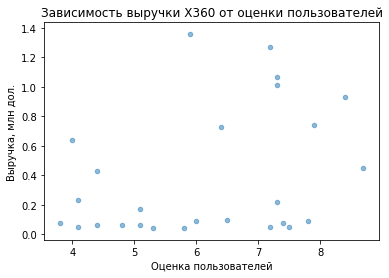

In [580]:
df_new_x360.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки X360 от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [581]:
df_new_x360['total_sales'].corr(df_new_x360['user_score'])#корреляция

0.3365136248359934

Text(0.5, 0, 'Оценка критиков')

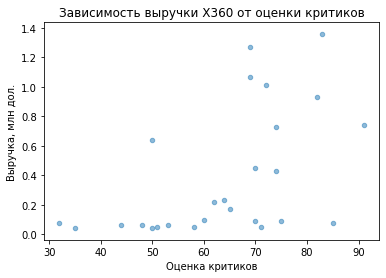

In [582]:
df_new_x360.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки X360 от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [583]:
df_new_x360['total_sales'].corr(df_new_x360['critic_score'])#корреляция

0.5257228356581523

In [584]:
#выделим в отдельную таблицу продажи по PS3
df_new_ps3 = df_new.query('platform == "PS3" and user_score != -1 and critic_score != -1')
df_new_ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1532,Assassin's Creed: Rogue,PS3,2014,Action,0.46,0.56,0.06,0.20,72.0,7.5,M,1.28
1550,Dark Souls II,PS3,2014,Role-Playing,0.40,0.33,0.40,0.15,91.0,8.1,T,1.28
2236,The LEGO Movie Videogame,PS3,2014,Action,0.33,0.43,0.02,0.15,80.0,6.8,E10+,0.93
2248,South Park: The Stick of Truth,PS3,2014,Role-Playing,0.43,0.34,0.00,0.16,85.0,8.5,M,0.93
2613,WWE 2K15,PS3,2014,Sports,0.36,0.29,0.00,0.13,55.0,3.1,T,0.78
3271,2014 FIFA World Cup Brazil,PS3,2014,Sports,0.15,0.36,0.01,0.09,73.0,4.3,E,0.61
3301,Borderlands: The Pre-Sequel,PS3,2014,Shooter,0.26,0.21,0.05,0.10,77.0,6.3,M,0.62
3416,Metal Gear Solid V: Ground Zeroes,PS3,2014,Action,0.14,0.12,0.27,0.05,66.0,5.9,M,0.58
4490,Naruto Shippuden: Ultimate Ninja Storm Revolution,PS3,2014,Fighting,0.15,0.14,0.09,0.06,73.0,7.5,T,0.44
4495,MLB 14: The Show,PS3,2014,Sports,0.35,0.00,0.00,0.08,81.0,6.8,E,0.43


Text(0.5, 0, 'Оценка пользователей')

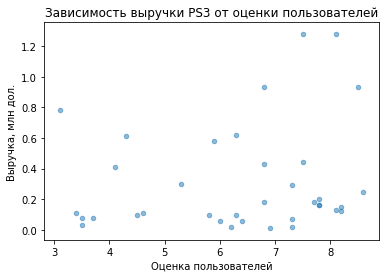

In [585]:
df_new_ps3.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS3 от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [586]:
df_new_ps3['total_sales'].corr(df_new_ps3['user_score'])#корреляция

0.1565951618135996

Text(0.5, 0, 'Оценка критиков')

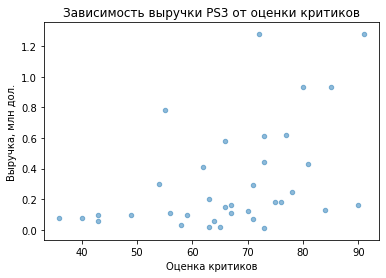

In [587]:
df_new_ps3.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS3 от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [588]:
df_new_ps3['total_sales'].corr(df_new_ps3['critic_score'])#корреляция

0.44657460493190704

In [589]:
#выделим в отдельную таблицу продажи по XOne
df_new_xone = df_new.query('platform == "XOne" and user_score != -1 and critic_score != -1')
df_new_xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16322,Agatha Christie's The ABC Murders,XOne,2016,Adventure,0.01,0.00,0.00,0.00,66.0,7.5,Unknown,0.01
16392,Goat Simulator,XOne,2016,Simulation,0.00,0.01,0.00,0.00,53.0,6.3,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01


Text(0.5, 0, 'Оценка пользователей')

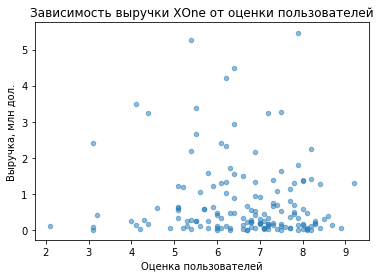

In [590]:
df_new_xone.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки XOne от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [591]:
df_new_xone['total_sales'].corr(df_new_xone['user_score'])#корреляция

-0.09173434503310748

Text(0.5, 0, 'Оценка критиков')

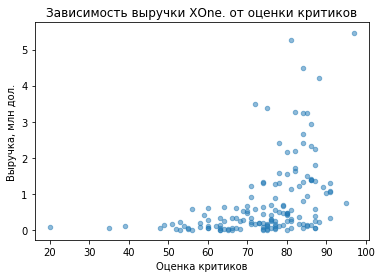

In [592]:
df_new_xone.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки XOne. от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [593]:
df_new_xone['total_sales'].corr(df_new_xone['critic_score'])#корреляция

0.4221118510555765

In [594]:
#выделим в отдельную таблицу продажи по 3DS
df_new_3ds = df_new.query('platform == "3DS" and user_score != -1 and critic_score != -1')
df_new_3ds

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
457,Animal Crossing: Happy Home Designer,3DS,2015,Simulation,0.51,1.02,1.40,0.12,66.0,6.9,E,3.05
677,The Legend of Zelda: Majora's Mask 3D,3DS,2015,Action,1.15,0.55,0.47,0.17,89.0,9.0,E10+,2.34
952,Kirby: Triple Deluxe,3DS,2014,Platform,0.61,0.34,0.79,0.09,80.0,8.8,E,1.83
1395,Yoshi's New Island,3DS,2014,Platform,0.48,0.53,0.28,0.09,64.0,6.1,E,1.38
1596,Pokemon Super Mystery Dungeon,3DS,2015,Role-Playing,0.48,0.35,0.34,0.08,69.0,8.8,E,1.25
1817,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,0.53,0.33,0.17,0.08,73.0,7.6,E,1.11
2219,Kirby: Planet Robobot,3DS,2016,Action,0.28,0.14,0.47,0.04,81.0,8.7,E,0.93
2839,Persona Q: Shadow of the Labyrinth,3DS,2014,Role-Playing,0.34,0.07,0.27,0.04,83.0,8.1,M,0.72
3718,Final Fantasy Explorers,3DS,2014,Role-Playing,0.16,0.07,0.28,0.02,69.0,7.0,E10+,0.53


Text(0.5, 0, 'Оценка пользователей')

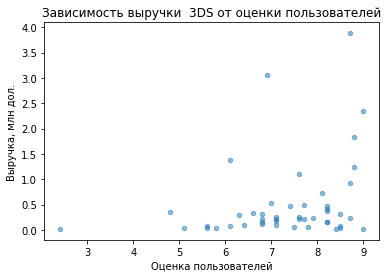

In [595]:
df_new_3ds.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки  3DS от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [596]:
df_new_3ds['total_sales'].corr(df_new_3ds['user_score'])#корреляция

0.2798498792503281

Text(0.5, 0, 'Оценка критиков')

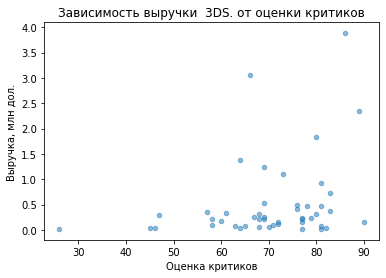

In [597]:
df_new_3ds.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки  3DS. от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [598]:
df_new_3ds['total_sales'].corr(df_new_3ds['critic_score'])#корреляция

0.28468579095782925

Общее распределение игр по жанрам.

In [599]:
df_new.pivot_table = df_new.groupby('genre').agg({'name':'count','total_sales':['median','sum']})

In [600]:
df_new.pivot_table.columns = ['mean', 'median','sum']

In [601]:
df_new.pivot_table = df_new.pivot_table.sort_values(by = 'mean', ascending = False)

In [602]:
df_new.pivot_table = df_new.pivot_table.sort_values(by = 'sum', ascending = False)
df_new.pivot_table

,mean,median,sum
genre,,,
Action,619,0.090,199.36
Shooter,128,0.515,170.94
Sports,161,0.180,109.48
Role-Playing,221,0.110,101.44
Misc,113,0.090,37.55
Fighting,60,0.125,28.22
Racing,69,0.090,27.52
Platform,38,0.140,18.09
Adventure,185,0.030,17.55


In [603]:
df_new.pivot_table = df_new.pivot_table.sort_values(by = 'median', ascending = False)
df_new.pivot_table

,mean,median,sum
genre,,,
Shooter,128,0.515,170.94
Sports,161,0.180,109.48
Platform,38,0.140,18.09
Fighting,60,0.125,28.22
Role-Playing,221,0.110,101.44
Simulation,44,0.100,13.13
Action,619,0.090,199.36
Misc,113,0.090,37.55
Racing,69,0.090,27.52


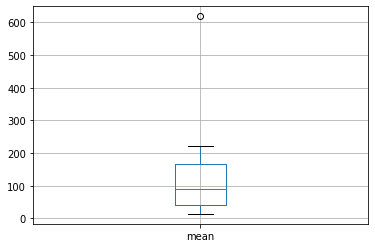

In [604]:
boxplot = df_new.pivot_table.boxplot(column=['mean'])


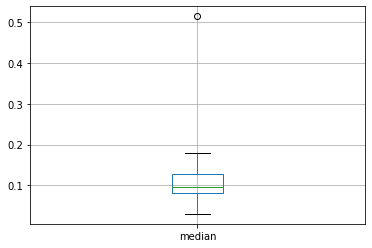

In [605]:
boxplot = df_new.pivot_table.boxplot(column=['median'])

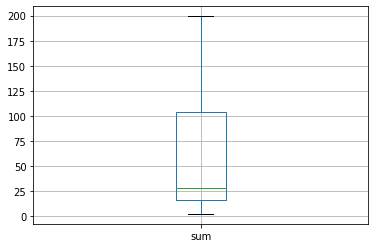

In [606]:
boxplot = df_new.pivot_table.boxplot(column=['sum'])

Если судить по средним и  суммарным продажам, то лидируют игры жанра Action, за ними идут жанры Sports и Shooter в суммарных и Role-Playing и Adventure в средних продажах. Самые низкие сборы у жанров Simulation,Strategy,Puzzle.
По медианным продажам лидером является жанр Shooter. за ним Sports и Platform. Аутсайдеры здесь женры:Strategy,Puzzle,Adventure.
 

Вывод:

Провели исследовательский анализ данных, выделили срез данных за 2009-2016 гг, нашли 10 платформ-лидеров по продажам.

 Прибыли у большинства платформ приходится на 2008-2011 годы. Позднее выручка становится все меньше и меньше. Назвать потенциально прибыльной  можно только платформу PS4.

На примере PS4 рассмотрели корреляцию оценка критика/выручка и оценка пользователя/выручка и пришли к выводу, что отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей.

Больше всего выручка у платформы при оценке критиков 70 и выше.

Самыми прибыльными оказались жанры Action, Sports и Shooter по суммарным и средним продажам и жанры Shooter, Sports и Platform по медианным.

Самые низкие сборы у жанров Simulation,Strategy,Puzzle по суммарным и средним продажам и Strategy,Puzzle,Adventure по медианным.

По всем платформам наблюдается средняя корреляция между оценками пользователей и критиков.



## Шаг 4. Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):

самые популярные платформы (топ-5)

самые популярные жанры (топ-5)

влияние рейтинга ESRB на продажи в регионе

Северная Америка

In [607]:
(df_new
 .groupby('platform')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


In [608]:
(df_new
 .groupby('genre')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


In [609]:
df_rating_na = pd.pivot_table(df_new,
                             index='rating',
                             values='na_sales',
                             aggfunc='sum').sort_values(
    by=(('na_sales')), ascending=False).reset_index()
df_rating_na                                                   

,rating,na_sales
0,M,96.42
1,Unknown,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


в Северной Америке лидируют платформы X360, PS3 и Wii.

самые популярные жанры - Action, Shooter, Sports, Misc и Role-Playing

 по продажам лидирует рейтинг М, затем идут не определенный рейтинг Unknown и Е

Европа

In [610]:
(df_new
 .groupby('platform')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


In [611]:
(df_new
 .groupby('genre')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


In [612]:
df_rating_eu = pd.pivot_table(df_new,
                             index='rating',
                             values='eu_sales',
                             aggfunc='sum').sort_values(
    by=(('eu_sales')), ascending=False).reset_index()
df_rating_eu

,rating,eu_sales
0,M,93.44
1,Unknown,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


в Европе лидируют все те же приставки, но распределение немного другое, здесь в топе PS3, затем X360 и Wii

самые популярные жанры все те же - Action, Shooter, Sports,Misc и Role-Playing

лидируют рейтинги M, Unknown и E

Япония

In [613]:
(df_new
 .groupby('platform')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


In [614]:
(df_new
 .groupby('genre')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


In [615]:
df_rating_jp = pd.pivot_table(df_new,
                             index='rating',
                             values='jp_sales',
                             aggfunc='sum').sort_values(
    by=(('jp_sales')), ascending=False).reset_index()
df_rating_jp


,rating,jp_sales
0,Unknown,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


лидируют совсем другие платформы - 3DS, DS, PS3, PSP, Wii

самые популярные жанры - Role-Playing, Action, Misc, Sports, Adventure. 

самые большие продажи у рейтингов, которые не определены. Затем T (для подростков) и Е(для всех. Похоже, в Японии выбирают более спокойные игры.

Другие страны

In [616]:
(df_new
 .groupby('platform')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head(5)
)

,platform,other_sales
3,PS4,44.48
9,XOne,12.52
2,PS3,9.37
8,X360,4.35
0,3DS,3.68


In [617]:
(df_new
 .groupby('genre')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head(5)
)

,genre,other_sales
0,Action,22.57
8,Shooter,21.53
10,Sports,14.36
7,Role-Playing,8.64
3,Misc,4.03


In [618]:
 df_rating_other_sales = pd.pivot_table(df_new,
                             index='rating',
                             values='other_sales',
                             aggfunc='sum').sort_values(
    by=(('other_sales')), ascending=False).reset_index()
 df_rating_other_sales

,rating,other_sales
0,M,28.67
1,Unknown,18.40
2,E,15.39
3,T,11.33
4,E10+,7.83


In [619]:
# Комментарий ревьюера 
df_new.rating.value_counts()

Unknown    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

Вывод:

В Северной Америке и Европе картина примерно одинакова:

лидируют платформы X360, Wii и DS, PS3 с небольшой разницей в распределении продаж.
самые популярные жанры - Action, Sports,Shooter, Misc.
Лидирует рейтинг М (для всех), на втором месте Е (18+) в Европе и М и Unknown  в Сев. Америке. На третьем месте Е.

В Японии немного по-другому:
лидируют совсем другие платформы - 3DS, WiiU, DS, PSP, PS3
Самые популярные жанры - Role-Playing, Platform, Sports, Misc, Action. Самые большие продажи у рейтингов, которые не определены. Затем T (для подростков) и Е(для всех.

Другие страны:
Для остальных стран портрет потребителя примерно схож с потребителями из СА и Европы. Лидируют те же платформы, жанры и рейтинги. Значит Япония - достаточно специфический рынок, к которому нужен особый подход в плане рекламных кампаний.

## Шаг 5. Проверим гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind ()

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.
H₁ - средние пользовательские рейтинги платформ Xbox One и PC не равны


In [529]:
#зададим критический уровень статистической значимости
alpha = 0.05

In [530]:
xone = df_new.query('platform == "XOne" and user_score != -1')['user_score']
pc =df_new.query('platform == "PC" and user_score != -1')['user_score']



In [531]:

results = st.ttest_ind(
    xone, 
    pc, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    


p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Вывод:

p-значение 11,6%, мы не можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H₀ - средние пользовательские рейтинги жанров Action и Sports равны
Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H₁ - средние пользовательские рейтинги жанров Action и Sports не равны
Средние пользовательские рейтинги жанров Action и Sports различаются.

In [532]:
alpha = 0.05

In [533]:
action = df.query('genre == "Action" and user_score != -1')['user_score']
sports = df.query('genre == "Sports" and user_score != -1')['user_score']

In [534]:
results = st.ttest_ind(
    action,
    sports, equal_var=False)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Вывод

p-значение менее 5%, мы можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод.
В связи с тем , что данные из открытых источников достаточно много пропущенных значений. При предобработке :
удалены строки с отсутствующим названием игры(2 строки).
По году выпуска изменен тип данных на int.
Пропущенные данные по оценке пользователей и критиков не заполнялись. По оценке пользователей изменен тип данных на float. Значение tbd заменено на -1, так же как и пропуски  в  оценке пользователей и критиков 
 

Мы видим что средний срок жизни платформы около 9.5 лет и актуальность данных 3года(с 2013по 2016)

Исходя из данных мы видим лидеров по платформам: PS4, X360 и PS3. 
Мы видим слабую корреляцию между отзывами пользователей и продажами для топовой платформы, и среднюю корреляцию между отзывами критиков и объемами продаж игр. 
Самые прибыльные жанры: Action, Sports, Shooter.
Самые низкодоходные жанры: Adventure, Strategy, Puzzle

Составили портреты пользователей:
Протрет пользователя в Северной Америке:

лидируют платформы X360, PS3 и Wii.
самые популярные жанры - Action, Shooter, Sports, Misc и Role-Playing
по продажам лидирует рейтинг М, затем идут не определенный рейтинг Unknown и Е

Протрет пользователя в Европе:
лидируют все те же приставки, но распределение немного другое, здесь в топе PS3, затем X360 и Wii
самые популярные жанры все те же - Action, Shooter, Sports,Misc и Role-Playing
также лидируют рейтинги E и M

Протрет пользователя в Японии:
лидируют совсем другие платформы - 3DS, DS, PS3, PSP, Wii
самые популярные жанры - Role-Playing, Action, Misc, Sports, Adventure.
Самые большие продажи у рейтингов, которые не определены. Затем T (для подростков) и Е(для всех.

Мы видим, что портрет американского потребителя и европейского почти одинаковый. Японцы имеют другой интерес по платформам и  больше предпочитают ролевые игры. 

Мы проверили гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. У нас не получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно по альтернативной гипотезе средние пользовательские рейтинги могут отличатся, опровергнуть ее у нас не получилось.
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. У нас получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно делать какие либо выводы по данным от разных жанров мы не можем.
